# Get file

In [ ]:
! cp /content/drive/MyDrive/AICUP2021/all_new_data.zip ./
! unzip -q /content/all_new_data.zip -d ./image

In [ ]:
! find ./image -name '.DS_Store' -type f -delete

# import basic 

In [ ]:
from IPython.display import clear_output
import cv2
import os
from os import listdir
from os.path import isfile, join
import shutil
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf

clear_output()

# 將所有資料夾內的資料統整和前處理

In [ ]:
path = "/content/image"
trian_data = os.listdir(path)
for folder in trian_data[: -1]:
    print(folder)

station4_white_pin2021_4_13_1618215204
station4_white_pin2021_3_26_1616728021
station4_white_pin2021-2-23_1614072478
station4_white_pin2021_6_10_1623313550
station4_white_pin2021_3_2_1614691284
station4_white_pin2021-2-9_1612936555
station4_white_pin2021-3-1_1614604523
station4_white_pin2021_5_25_2_1621915791
station4_white_pin2021_5_25_1621907920
station4_white_pin2021-3-1_1614591023
station4_white_pin2021-2-25_1614236947
station4_white_pin2021_5_26_1621999356


In [ ]:
def create_new_dir(new_path_name):
    path = "./" + new_path_name
    if os.path.isdir(path):
        shutil.rmtree(path)
        # os.rmdir("./all_image")
    os.mkdir(path)
    os.mkdir(join(path,"ok"))
    os.mkdir(join(path,"ng"))

In [ ]:
new_path = "all_image"
create_new_dir("all_image")

path = "/content/image"
size =  (299,299)
ng_count = 0
ok_count = 0


trian_data = os.listdir(path)
# for folder in trian_data[: -1]:
for folder in os.listdir(path):
    full_path = join(path,folder)
    for sub_folder in os.listdir(full_path):
        full_sub_folder_path = join(full_path,sub_folder)
        # print(full_sub_folder_path,os.listdir(full_sub_folder_path))
        for file_name in os.listdir(full_sub_folder_path+"/ng"):
            if  file_name[-3:] == "jpg":
                full_name = full_sub_folder_path+"/ng/"+file_name
                img = cv2.resize(cv2.imread(full_name), size)
                cv2.imwrite(new_path+"/ng/"+folder+file_name, img)
                # cv2.imwrite("{}/ng/{}.jpg".format(new_path,ng_count), img)
                # ng_count+=1
            else:
                print(file_name)
        for file_name in os.listdir(full_sub_folder_path+"/ok"):
            if  file_name[-3:] == "jpg":
                full_name = full_sub_folder_path+"/ok/"+file_name
                img = cv2.resize(cv2.imread(full_name), size)
                cv2.imwrite(new_path+"/ok/"+folder+file_name, img)
                # cv2.imwrite("{}/ok/{}.jpg".format(new_path,ok_count), img)
                # ok_count+=1
            else:
                print(file_name)
print(len(os.listdir("/content/all_image/ok")))
print(len(os.listdir("/content/all_image/ng")))

desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
desktop.ini
37190
5735


## updata to G-drive

In [ ]:
%cd /content/all_image
! zip -r -q /content/TE_allimg_299x299.zip ./*
%cd /content
# ! rm /content/drive/MyDrive/AICUP2021/TE_allimg_299x299.zip
! cp /content/TE_allimg_299x299.zip /content/drive/MyDrive/AICUP2021


# ## unzip file from G-drive
# ! unzip -q TE_allimg_299x299.zip -d TE_allimg_299x299
# # ! unzip -q TE_allimg_299x299.zip
# ! rm TE_allimg_299x299.zip

/content/all_image
/content


In [ ]:
! ls -l --block-size=M

In [ ]:
! cp /content/TE_allimg_299x299.zip /content/drive/MyDrive/AICUP2021

^C


# Create more error image

## get file from G-drive

In [ ]:
! cp /content/drive/MyDrive/AICUP2021/TE_allimg_299x299.zip ./
! unzip -q TE_allimg_299x299.zip -d all_image

## make more error image from ng

In [ ]:
ng_path = "/content/all_image/ng"
sample_size = len(os.listdir(ng_path))//10
rng = np.random.default_rng()
sample= rng.choice(os.listdir(ng_path), sample_size)
gen = 9

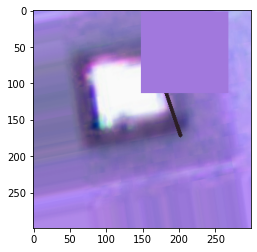

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import random

def add_noise(img):
    '''Add random noise to an image'''
    if random.choice([True,True, False]):
        VARIABILITY = 3
        deviation = VARIABILITY*random.random()
        noise = np.random.normal(0, deviation, img.shape)
        img += noise
        np.clip(img, 0., 255.)
    return img

def random_error(img):
    if random.choice([True, True, False]):
        start = (random.randrange(0, img.shape[0]),random.randrange(0, img.shape[1]))
        end = (random.randrange(0, img.shape[0]),random.randrange(0, img.shape[1]))
        c = (random.randrange(0,50),random.randrange(0,50),random.randrange(0,50))
        w = random.randrange(1,10)
        # cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
        cv2.line(img,start,end,c,w)
    if random.choice([True, True, False]):
        x = random.randrange(0, img.shape[0])
        y = random.randrange(0, img.shape[1])
        mask_size_x = random.randrange(0, img.shape[0]//2)
        mask_size_y = random.randrange(0, img.shape[1]//2)
        img[x:x+mask_size_x , y:y+mask_size_y] = img[random.randrange(0, img.shape[0]),random.randrange(0, img.shape[1])]
    if random.choice([True, True, False]):
        VARIABILITY = 3
        deviation = VARIABILITY*random.random()
        noise = np.random.normal(0, deviation, img.shape)
        img += noise
    if random.choice([True, True, False]):
        img = tf.image.stateless_random_hue(img,0.2,(1, 2))
    np.clip(img, 0., 255.)
    return img

for img_name in sample:
    # print(join(ng_path,img_name))
    img = load_img(join(ng_path,img_name))
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = np.expand_dims(data, 0)
    # create image data augmentation generator
    # https://zhuanlan.zhihu.com/p/30197320
    # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=[0.8,1.2],
            shear_range=0.5,
            channel_shift_range=3,
            preprocessing_function=random_error,
        )
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(gen):
        # define subplot
        # plt.subplot(440 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.imsave("{}_{}.jpg".format(join(ng_path,img_name),i),image)
        # plt.imsave("/content/test_{}.jpg".format(i),image)
    # plt.show()

In [ ]:
print(len(os.listdir("/content/all_image/ng")))
print(len(os.listdir("/content/all_image/ok")))

10631
37190


## validation_split

In [ ]:
validation_split

## remove image in root

In [ ]:
! rm /content/*.jpg

## save file to G-drive

In [ ]:
save_file_name = "TE_PP_new"

In [ ]:
!ls {save_file_name}

ls: cannot access 'TE_PP_new': No such file or directory


In [ ]:
%cd /content/all_image
! zip -r -q /content/{save_file_name}.zip ./*
%cd /content
# ! rm /content/drive/MyDrive/AICUP2021/content/{save_file_name}.zip
! cp /content/{save_file_name}.zip /content/drive/MyDrive/AICUP2021

/content/all_image
/content
